In [52]:
!pip install kaggle

In [53]:
kaggle_key = '{\"username\":"kobapbopy\",\"key\":\"149cfb534c833f26b6aabdce7f59c052\"}'
with open('kaggle.json', 'w') as f:
  f.write(kaggle_key)

In [54]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [55]:
!kaggle datasets download -d prashantarorat/facial-key-point-data

facial-key-point-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [67]:
from zipfile import ZipFile
import shutil
import os
!gdown 'https://github.com/rrrepsac/landmarks/archive/refs/heads/main.zip'
with ZipFile('main.zip', 'r') as zf:
  mutils_names = [x for x in zf.namelist() if 'mutils' in x]
  zf.extractall(members=mutils_names)
if os.path.exists('mutils'):
  shutil.rmtree('mutils')

shutil.move('landmarks-main/mutils/', 'mutils')
shutil.rmtree('landmarks-main')

Downloading...
From: https://github.com/rrrepsac/landmarks/archive/refs/heads/main.zip
To: /content/main.zip
100% 96.3k/96.3k [00:00<00:00, 12.6MB/s]
delete...


In [ ]:
# import importlib
import mutils
from mutils.unets import *
# from mutils.PIL_test import *

ModuleNotFoundError: ignored

In [ ]:
def test_unet(resize=4, landmarks_number=3, batch_size=8, epochs=5, shuffle=True,
              max_affine_deg=0, distortion_scale=0.):
    print(torchvision.__version__)
    
    
    model = UFLandmarks(3, landmarks_number)

    ds = FaceLandmarks(Path('./face_landmarks.zip'),
                       landmarks_number, mode='tensor', resize=resize, #new_size=96,
                       distortion_scale=distortion_scale, max_affine_degree=max_affine_deg)
    optim = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = LandmarksLoss('round_5gauss', sigma=4.)

    
    for epoch in range(epochs):
        for bn, (batch_img, batch_landmarks) in enumerate(DataLoader(ds, batch_size=batch_size, shuffle=shuffle)):
            optim.zero_grad()

            pred_heatmap = model(batch_img)
            loss = criterion(pred_heatmap, batch_landmarks.view(-1,2))
            loss.backward()
            optim.step()
            # if loss != loss:
                # print('naaaaan')
            if bn % 10 == 0 or loss != loss:
                print(
                    f'{epoch}_{epoch*len(ds) + bn*batch_size:5d} img passed loss = {loss:.3e}')
                img = batch_img[0].detach().unsqueeze(0)
                with torch.no_grad():
                    pred_test = model(img.detach()).detach()
                pred_marks = argmax2d(pred_test)#, dim=(-2, -1))
                pil_img = ToPILImage()(img[0])
                ax = plt.subplot(131)   
                ax.imshow(pil_img)
                ax = plt.subplot(132)
                true_heatmap = criterion.get_heatmap_from(batch_landmarks.detach().view(-1),
                                                        pred_heatmap.shape, criterion.bell)
                sum_heatmap = torch.zeros_like(pred_heatmap[0][0])
                for mn in range(landmarks_number):
                    sum_heatmap = sum_heatmap + pred_heatmap[0][mn]
                ax.imshow(ToPILImage()(sum_heatmap), alpha=0.5)
                plt_utils.draw_marks(pred_marks[0].view(-1), color='r')
                ax = plt.subplot(133)
                sum_heatmap = torch.zeros_like(true_heatmap[0][0])
                for mn in range(landmarks_number):
                    sum_heatmap = sum_heatmap + true_heatmap[0][mn]
                ax.imshow(ToPILImage()(sum_heatmap), alpha=1.)
                # plt_utils.draw_marks(batch_landmarks.detach()[0].view(-1), color='g')
                # dlib_utils.draw_landmarks(pil_img, color='blue')
                # assert False
                

                plt.show()
                # if loss != loss:
                    # print(torch.Tensor(pp).tolist())
                    # assert False

    return None


0.8.1
3.3.4 plt
0_    0 img passed loss = nan


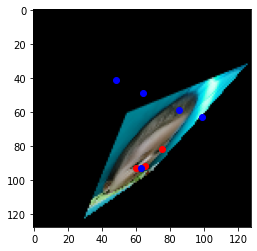

[[[0.0, 0.0], [127.0, 0.0], [127.0, 127.0], [0.0, 127.0]], [[55.0, 61.0], [126.0, 32.0], [70.0, 95.0], [30.0, 123.0]]]


AssertionError: 

In [ ]:
# importlib.reload(PIL_test)
PIL_test.test_cnn(4, 3, 1, epochs=2, shuffle=False, max_affine_deg=0, distortion_scale=0.99)


In [ ]:
import torch
torch.__version__


'1.7.0'